# Lead Scoring Case Study

### Problem Statement:


 An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. A model is required to be built wherein a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance and the CEO has given a ballpark of the target lead conversion rate to be around 80%

In [1]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data 

In [2]:
df = pd.read_csv('Leads.csv')

### Data Observations

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

#### We have 9240 rows and 37 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

#### Checking for unique valued columns 

In [7]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
df.drop(['Magazine','Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque'],axis=1,inplace=True)


In [9]:
df.shape

(9240, 32)

In [10]:
(df.isnull().sum()/len(df.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [12]:
#Dropping columns with more than 2500 null values
for col in df.columns:
    if df[col].isnull().sum() > 3000:
        df.drop(col, 1, inplace=True)

In [13]:
df.shape

(9240, 26)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
(df.isnull().sum()/len(df.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [16]:
df['City'] = df['City'].fillna('not provided')

In [17]:
df['City'].value_counts()/len(df['City'].index)

Mumbai                         0.348701
Select                         0.243398
not provided                   0.153680
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [18]:
#Dropping City as it has 40% of of redundent data(15% null/not provided and 24% 'Select') and imputing them will skew it
df.drop(['City'],axis=1,inplace=True)


In [19]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
#Dropping col 'How did you hear about X Education'  as majority is not selected or null 
df.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [21]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [22]:
#Dropping col 'Lead Profile'  as majority is not selected or null 
df.drop(['Lead Profile'],axis=1,inplace=True)

In [23]:
(df.isnull().sum()/len(df.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [24]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
#Dropping col 'Lead Profile'  as majority is not selected or null and no proper way to impute them
df.drop(['Specialization'],axis=1,inplace=True)

In [27]:
#Imputing columns 
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Not Selected')
df['Country'] = df['Country'].fillna('Not Selected')
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not Selected')

In [28]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Not Selected                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
df['Country'].value_counts()

India                   6492
Not Selected            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [30]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Not Selected            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
#### We can further classify the country col as majority selected option is Indian
def slots(x):
    category = ""
    if x == "India":
        category = "india"
    elif x == "Not Selected":
        category = "Not Selected"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

india            6492
Not Selected     2461
outside india     287
Name: Country, dtype: int64

In [32]:
(df.isnull().sum()/len(df.index))*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [33]:
#### Dropping column 'Prospect ID' and 'Lead Number' as it is not necessary for our analysis.
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [34]:
#### Dropping few rows in column have less 2% null values
df.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Last Activity','Lead Source'], inplace=True)

In [35]:
(df.isnull().sum()/len(df.index))*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

In [36]:
df.shape

(9074, 20)

In [37]:
print((len(df.index)/9240)*100)

98.2034632034632


### After cleaning and imputing data we retain 98% rows and 20 columns

## EDA



In [38]:
categorical = df.select_dtypes(['object','category']).columns.to_list()

In [39]:
categorical

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

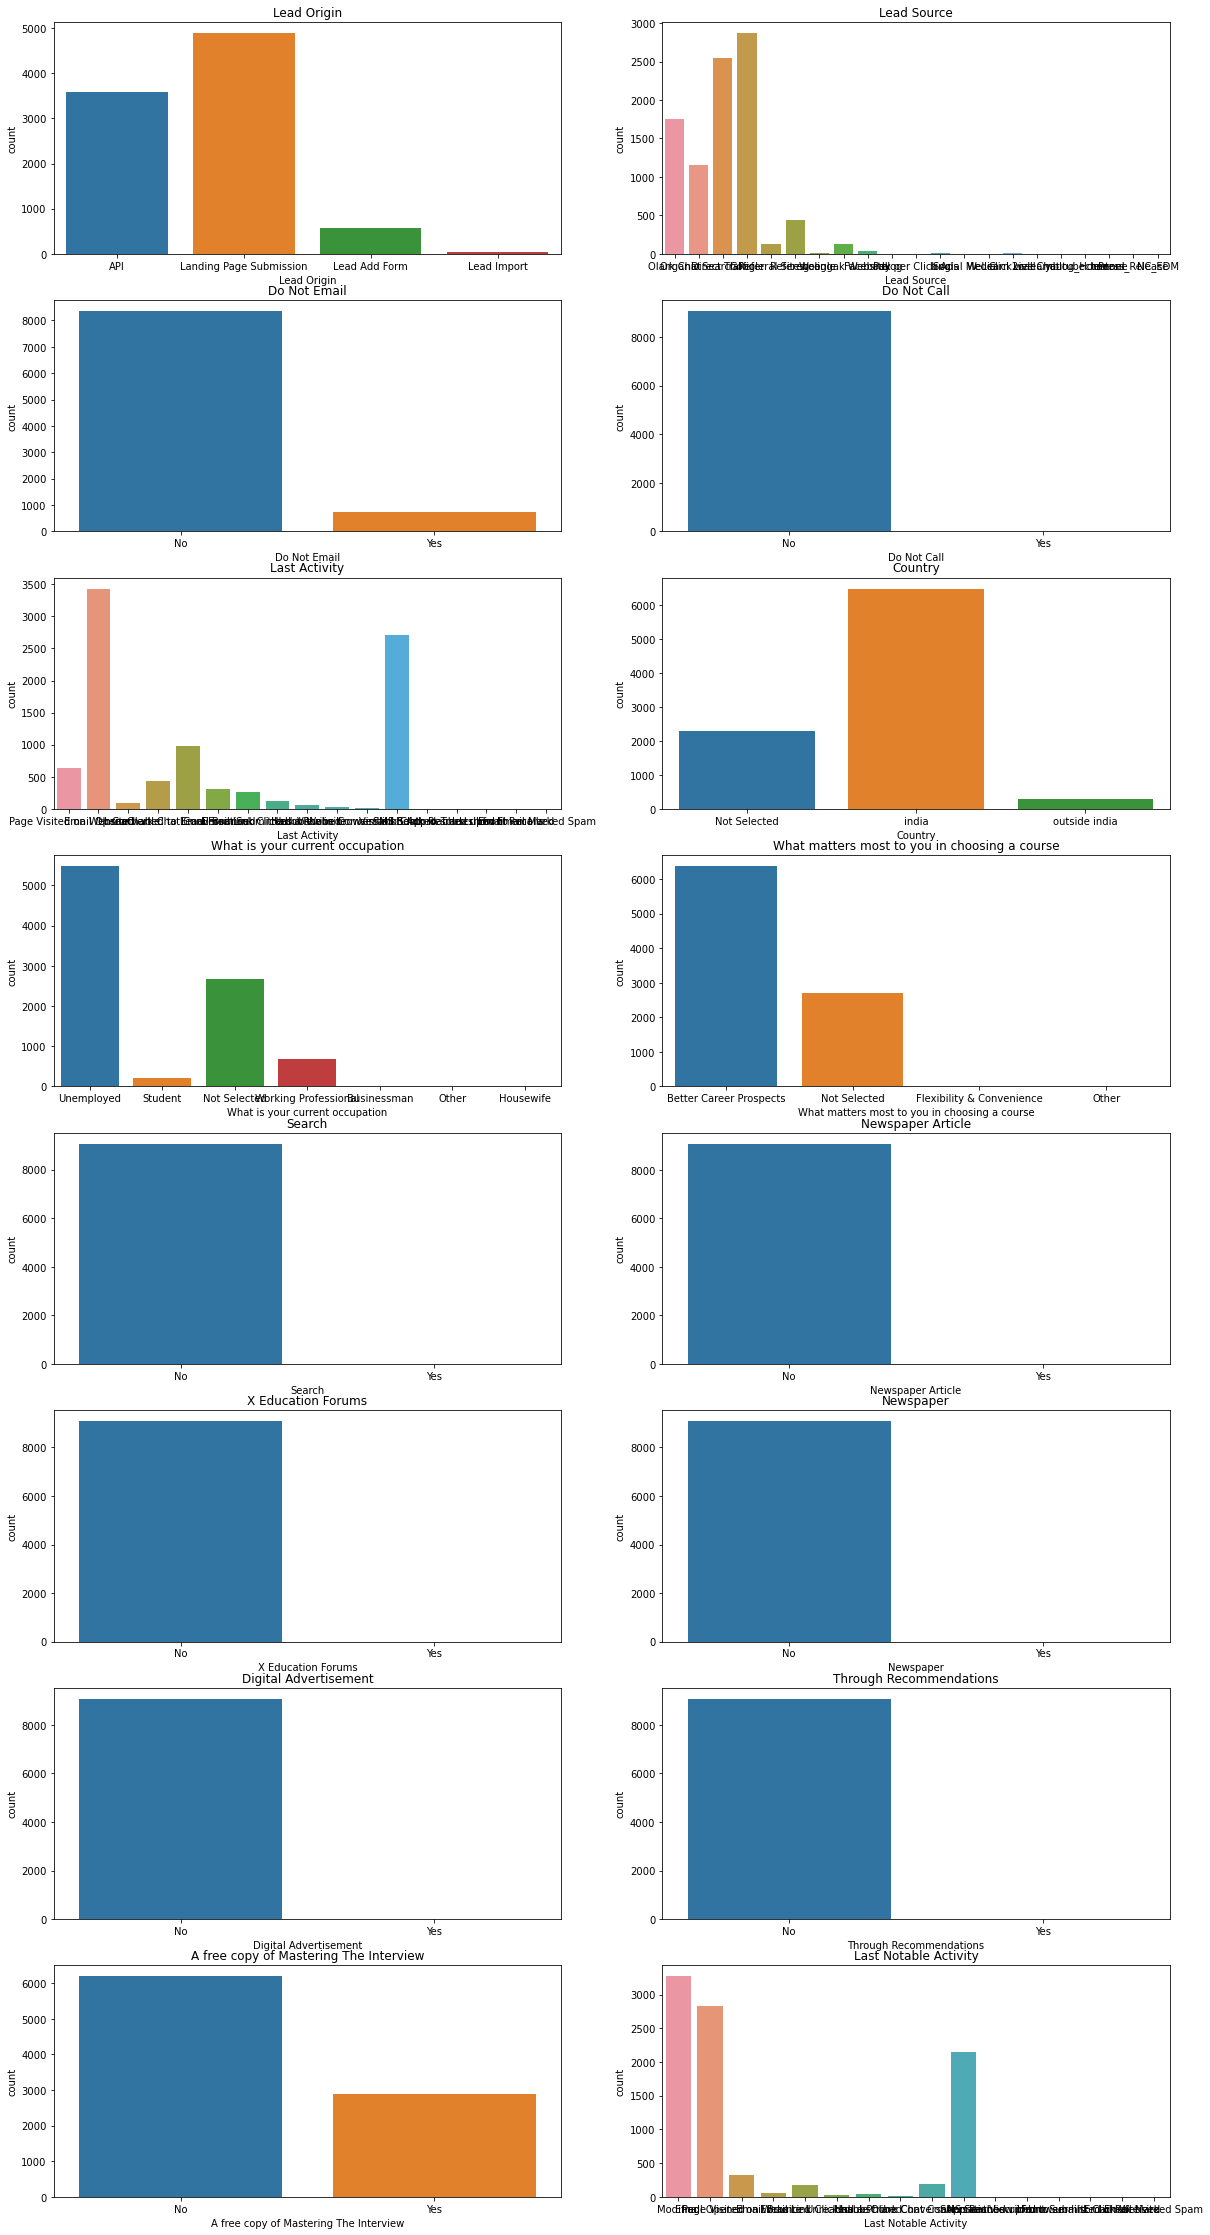

In [40]:
plt.figure(figsize = (20,40))
i=1

for col in categorical:
    plt.subplot(8,2,i)
    sns.countplot(df[col])
    plt.title(col)
    i=i+1
    
plt.show()

### Numerical variables

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

#### We have only 3 Numerical columns

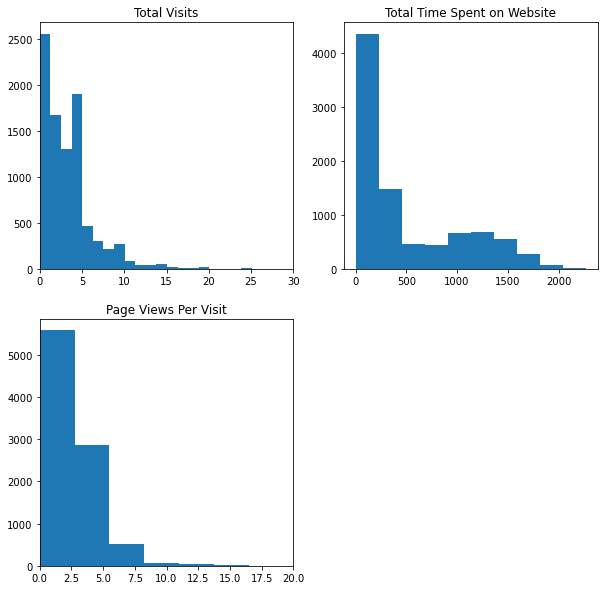

In [42]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,30)

plt.subplot(2,2,2)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Bi-Variate Analysis against target column Converted

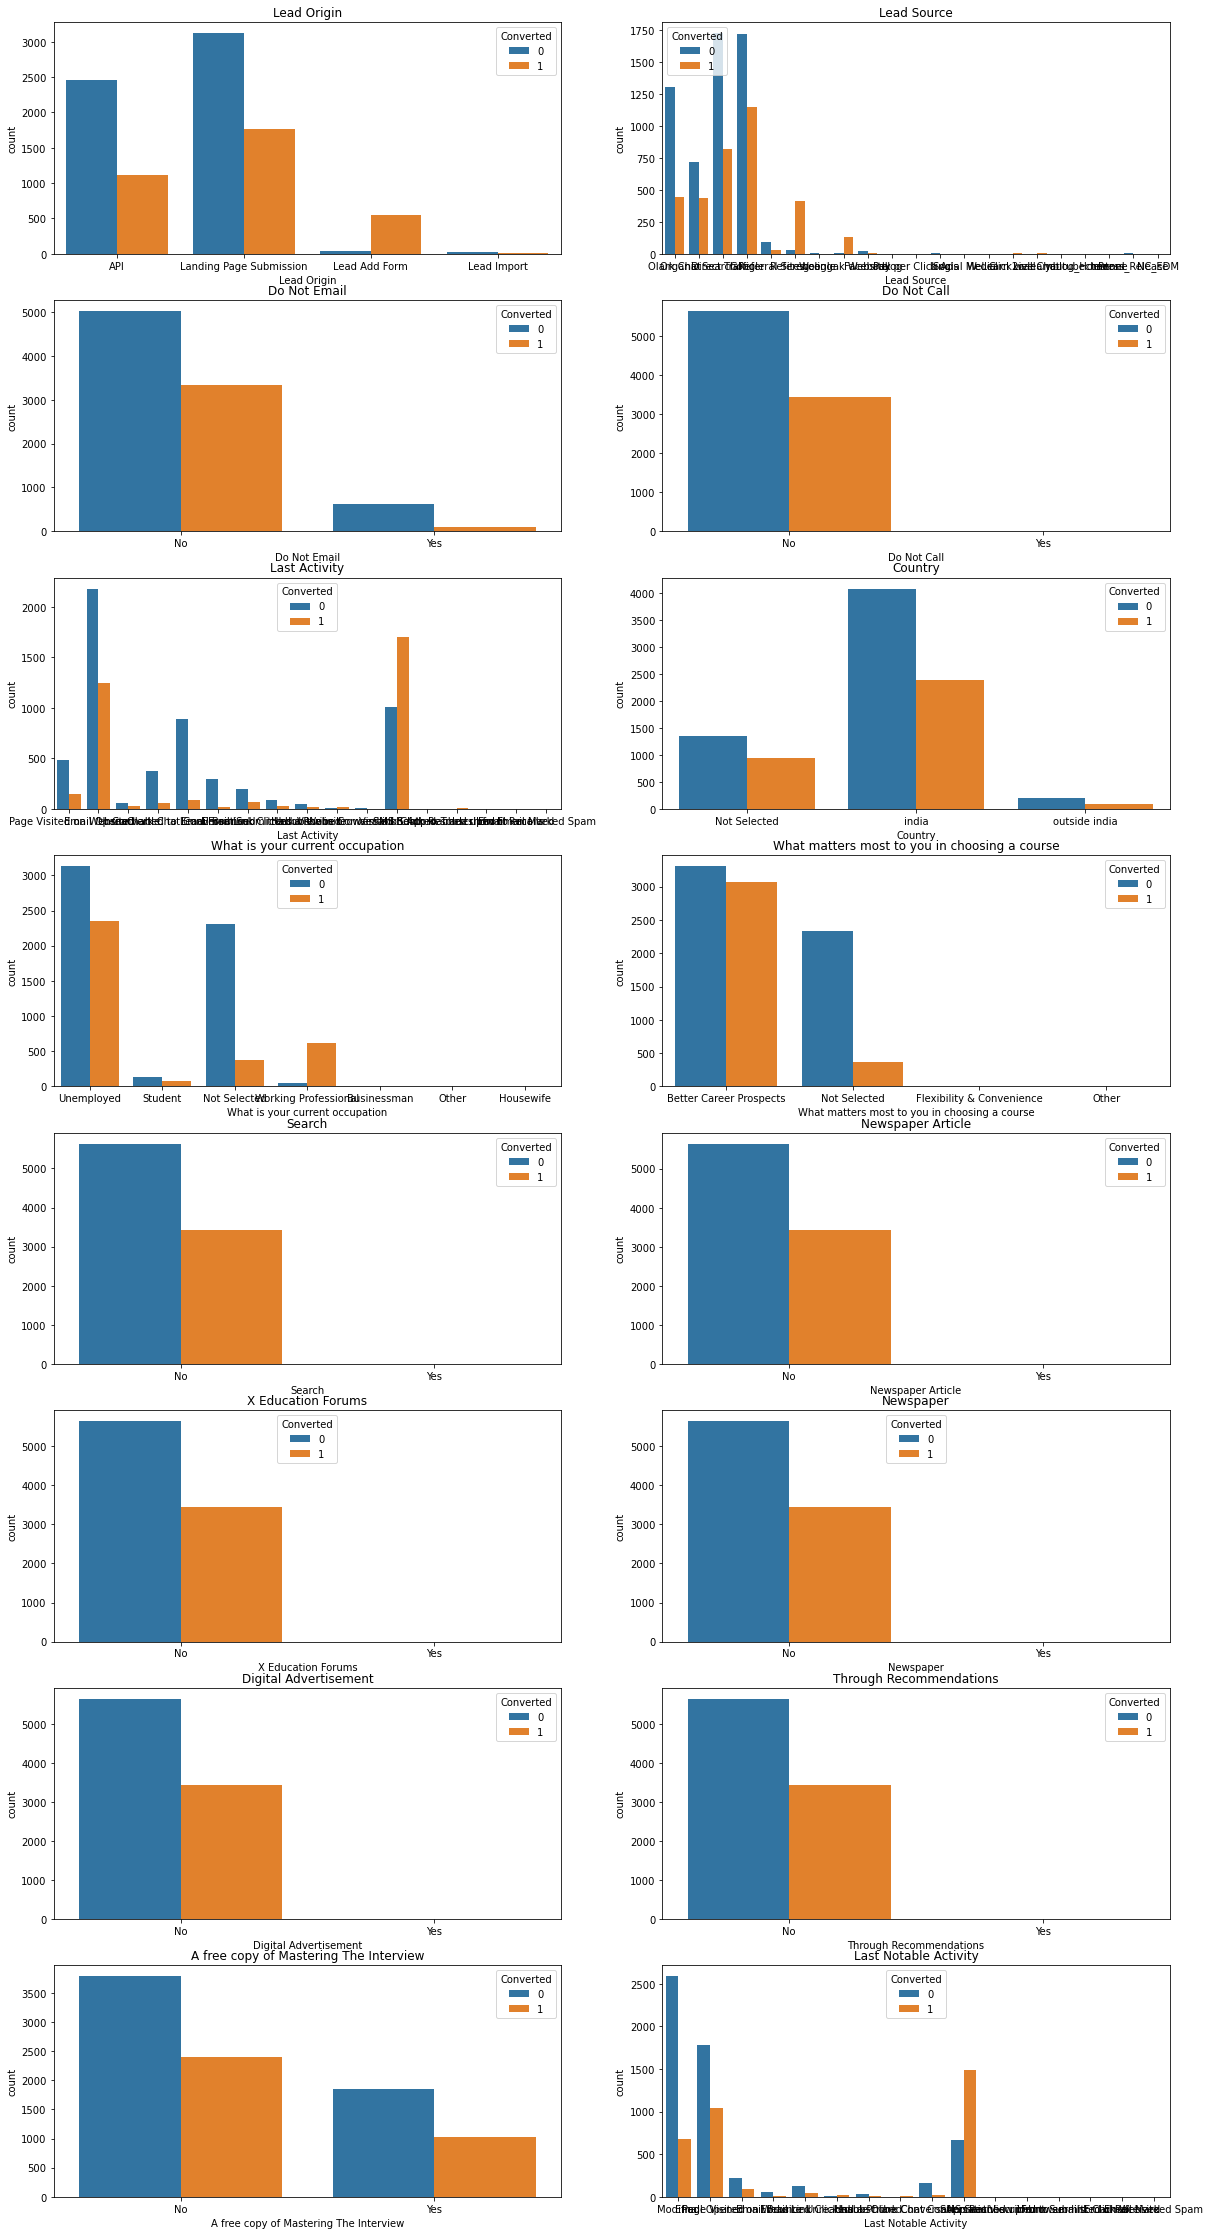

In [43]:
plt.figure(figsize = (20,40))
i=1

for col in categorical:
    plt.subplot(8,2,i)
    sns.countplot(x=col , hue='Converted' ,data=df)
    plt.title(col)
    i=i+1
    
plt.show()

#### Corelation among numerical Variables

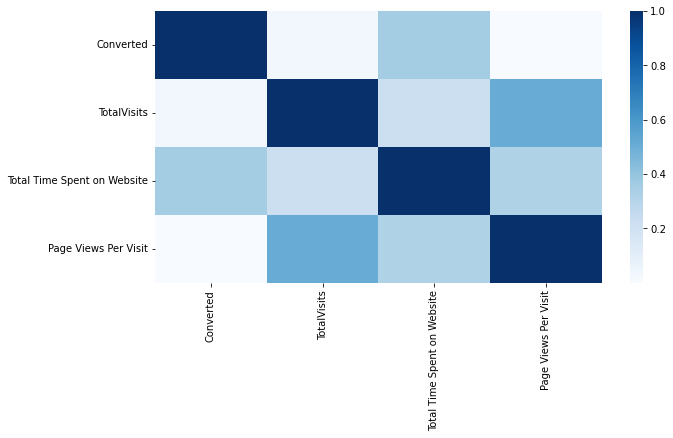

In [44]:

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="Blues")
plt.show()

#### Corelation for all variables

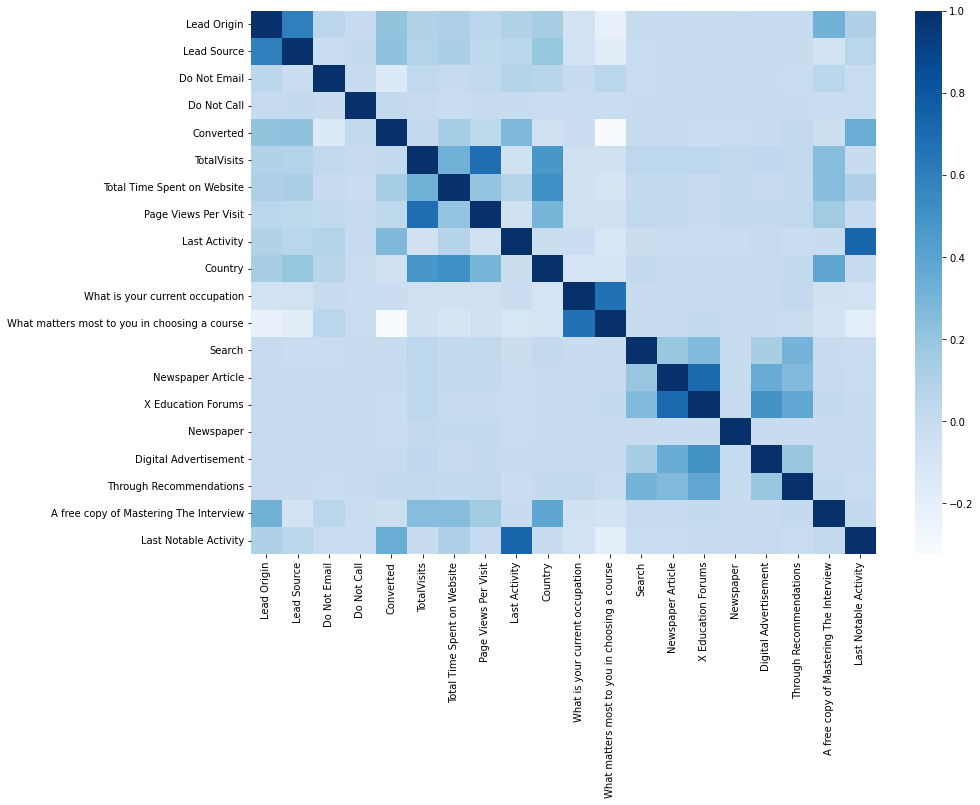

In [45]:
# visualizing correlation by heatmap
df1 = df
plt.figure(figsize=(14, 10))
sns.heatmap(df1.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), cmap='Blues')
plt.show()

### Creating dummy variables

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [47]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)


In [48]:
df_final = pd.concat([df, dummy], axis=1)
df_final

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Not Selected,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,india,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,india,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,india,...,0,0,0,0,0,0,1,0,0,0


In [49]:
df_final = df_final.drop(categorical, 1)
df_final

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Model building

In [50]:
# Import the required library
from sklearn.model_selection import train_test_split
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE
from sklearn.feature_selection import RFE
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Importing statsmodels
import statsmodels.api as sm
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing metrics from sklearn for evaluation
from sklearn import metrics

### Test-Train Split

In [51]:
X = df_final.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
# Assigning the target variable in y
y = df_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Scaling

In [54]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 49),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 50),
 ('Lead Source_Press_Release', False, 40),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_blog', False, 31),
 ('Lead Source_google', False, 17),
 ('Lead Source_testone', False, 29),
 ('Lead Source_welearnblog_Home', False, 39),
 (

In [57]:
# Selecting columns selected by RFE
X_train = X_train[X_train.columns[rfe.support_]]

In [58]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.2
Date:                Tue, 16 Aug 2022   Deviance:                       5268.5
Time:                        23:23:17   Pearson chi2:                 6.49e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3056      0.087    -26.448      0.000      -2.476      -2.135
TotalVisits                                              5.5028      1.439      3.825      0.000       2.683       8.322
Total Time Spent on Website                              4.6285      0.167     27.706      0.000       4.301       4.956
Lead Origin_Lead Add Form                                1.7730      1.179      1.503      0.133      -0.538       4.084
Lead Source_Olark Chat                                   1.6004      0.112     14.329      0.000       1.381       1.819
Lead Source_Reference                                    2.0085      1.199      1.676      0.094      -0.341       4.358
Lead Source_Welingak Website                             4.5673      1.554      2.940      0.003       1.522       7.612
Do Not Email_Yes                                        -1.4310      0.171     -8.384      0.000      -1.766      -1.097
Last Activity_Had a Phone Conversation                   0.5721      0.844      0.678      0.498      -1.082       2.226
Last Activity_Olark Chat Conversation                   -1.3810      0.167     -8.248      0.000      -1.709      -1.053
Last Activity_SMS Sent                                   1.2833      0.074     17.349      0.000       1.138       1.428
What is your current occupation_Housewife               24.2211   3.09e+04      0.001      0.999   -6.04e+04    6.05e+04
What is your current occupation_Not Selected            -1.1917      0.086    -13.845      0.000      -1.360      -1.023
What is your current occupation_Working Professional     2.5183      0.193     13.022      0.000       2.139       2.897
Last Notable Activity_Had a Phone Conversation          23.4331   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_Unreachable                        1.8318      0.602      3.045      0.002       0.653       3.011
========================================================================================================================
"""

In [59]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,82.15
4,Lead Source_Reference,64.27
5,Lead Source_Welingak Website,19.05
7,Last Activity_Had a Phone Conversation,1.89
13,Last Notable Activity_Had a Phone Conversation,1.89
1,Total Time Spent on Website,1.80
0,TotalVisits,1.70
3,Lead Source_Olark Chat,1.53
9,Last Activity_SMS Sent,1.47
11,What is your current occupation_Not Selected,1.41


In [60]:
#dropping 'Lead Origin_Lead Add Form' as it has high VIF and high p-value
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [61]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.6
Date:                Tue, 16 Aug 2022   Deviance:                       5271.1
Time:                        23:23:17   Pearson chi2:                 6.49e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3020      0.087    -26.443      0.000      -2.473      -2.131
TotalVisits                                              5.4923      1.436      3.825      0.000       2.678       8.307
Total Time Spent on Website                              4.6242      0.167     27.701      0.000       4.297       4.951
Lead Source_Olark Chat                                   1.6006      0.112     14.344      0.000       1.382       1.819
Lead Source_Reference                                    3.7777      0.229     16.524      0.000       3.330       4.226
Lead Source_Welingak Website                             6.3366      1.014      6.247      0.000       4.348       8.325
Do Not Email_Yes                                        -1.4330      0.171     -8.397      0.000      -1.767      -1.098
Last Activity_Had a Phone Conversation                   0.5711      0.844      0.677      0.498      -1.083       2.225
Last Activity_Olark Chat Conversation                   -1.3831      0.167     -8.263      0.000      -1.711      -1.055
Last Activity_SMS Sent                                   1.2846      0.074     17.369      0.000       1.140       1.430
What is your current occupation_Housewife               24.2185   3.09e+04      0.001      0.999   -6.05e+04    6.05e+04
What is your current occupation_Not Selected            -1.1943      0.086    -13.878      0.000      -1.363      -1.026
What is your current occupation_Working Professional     2.5158      0.193     13.011      0.000       2.137       2.895
Last Notable Activity_Had a Phone Conversation          23.4314   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_Unreachable                        1.8301      0.602      3.042      0.002       0.651       3.009
========================================================================================================================
"""

In [62]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,1.89
12,Last Notable Activity_Had a Phone Conversation,1.89
1,Total Time Spent on Website,1.80
0,TotalVisits,1.70
2,Lead Source_Olark Chat,1.53
8,Last Activity_SMS Sent,1.47
10,What is your current occupation_Not Selected,1.41
7,Last Activity_Olark Chat Conversation,1.39
11,What is your current occupation_Working Profes...,1.18
3,Lead Source_Reference,1.14


In [63]:
#dropping 'Last Notable Activity_Had a Phone Conversation' as it has high p-value
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [64]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.1
Date:                Tue, 16 Aug 2022   Deviance:                       5278.1
Time:                        23:23:18   Pearson chi2:                 6.49e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3002      0.087    -26.425      0.000      -2.471      -2.130
TotalVisits                                              5.5461      1.438      3.857      0.000       2.728       8.364
Total Time Spent on Website                              4.6153      0.167     27.675      0.000       4.288       4.942
Lead Source_Olark Chat                                   1.5997      0.112     14.336      0.000       1.381       1.818
Lead Source_Reference                                    3.7726      0.229     16.499      0.000       3.324       4.221
Lead Source_Welingak Website                             6.3355      1.014      6.246      0.000       4.347       8.324
Do Not Email_Yes                                        -1.4365      0.171     -8.423      0.000      -1.771      -1.102
Last Activity_Had a Phone Conversation                   1.9096      0.676      2.824      0.005       0.584       3.235
Last Activity_Olark Chat Conversation                   -1.3827      0.167     -8.262      0.000      -1.711      -1.055
Last Activity_SMS Sent                                   1.2845      0.074     17.372      0.000       1.140       1.429
What is your current occupation_Housewife               22.2172   1.14e+04      0.002      0.998   -2.22e+04    2.23e+04
What is your current occupation_Not Selected            -1.1964      0.086    -13.902      0.000      -1.365      -1.028
What is your current occupation_Working Professional     2.5142      0.193     13.003      0.000       2.135       2.893
Last Notable Activity_Unreachable                        1.8293      0.601      3.042      0.002       0.651       3.008
========================================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.80
0,TotalVisits,1.70
2,Lead Source_Olark Chat,1.53
8,Last Activity_SMS Sent,1.47
10,What is your current occupation_Not Selected,1.41
7,Last Activity_Olark Chat Conversation,1.39
11,What is your current occupation_Working Profes...,1.18
3,Lead Source_Reference,1.14
5,Do Not Email_Yes,1.07
4,Lead Source_Welingak Website,1.03


In [66]:
#dropping 'What is your current occupation_Housewife' as it has high p-values
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [67]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.9
Date:                Tue, 16 Aug 2022   Deviance:                       5287.8
Time:                        23:23:18   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2905      0.087    -26.399      0.000      -2.461      -2.120
TotalVisits                                              5.4923      1.432      3.836      0.000       2.686       8.298
Total Time Spent on Website                              4.6118      0.167     27.679      0.000       4.285       4.938
Lead Source_Olark Chat                                   1.5937      0.111     14.303      0.000       1.375       1.812
Lead Source_Reference                                    3.7727      0.228     16.515      0.000       3.325       4.220
Lead Source_Welingak Website                             6.3286      1.014      6.239      0.000       4.340       8.317
Do Not Email_Yes                                        -1.4394      0.170     -8.444      0.000      -1.773      -1.105
Last Activity_Had a Phone Conversation                   1.9036      0.676      2.816      0.005       0.579       3.229
Last Activity_Olark Chat Conversation                   -1.3860      0.167     -8.283      0.000      -1.714      -1.058
Last Activity_SMS Sent                                   1.2790      0.074     17.312      0.000       1.134       1.424
What is your current occupation_Not Selected            -1.1997      0.086    -13.947      0.000      -1.368      -1.031
What is your current occupation_Working Professional     2.5091      0.193     12.980      0.000       2.130       2.888
Last Notable Activity_Unreachable                        1.8241      0.601      3.033      0.002       0.645       3.003
========================================================================================================================
"""

In [68]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.80
0,TotalVisits,1.70
2,Lead Source_Olark Chat,1.53
8,Last Activity_SMS Sent,1.47
9,What is your current occupation_Not Selected,1.41
7,Last Activity_Olark Chat Conversation,1.39
10,What is your current occupation_Working Profes...,1.18
3,Lead Source_Reference,1.14
5,Do Not Email_Yes,1.07
4,Lead Source_Welingak Website,1.03


#### Model Evaluation

In [69]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.648609
3604    0.130494
5584    0.226369
7679    0.130494
7563    0.495356
7978    0.779823
7780    0.166646
7863    0.982674
838     0.771717
708     0.149145
dtype: float64

In [70]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64860873, 0.13049418, 0.22636908, 0.13049418, 0.49535644,
       0.77982317, 0.1666459 , 0.98267427, 0.7717174 , 0.14914494])

In [71]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.648609
1,0,0.130494
2,0,0.226369
3,0,0.130494
4,0,0.495356


In [72]:
#Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.648609,1
1,0,0.130494,0
2,0,0.226369,0
3,0,0.130494,0
4,0,0.495356,0


In [73]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3433,  462],
       [ 745, 1711]], dtype=int64)

In [74]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.809951188789167

#### We are getting an accuracy of 81% on train set

In [75]:
# Getting values of True Positive , False Postive , True Negative and False Negative
TP = confusion[1,1]

TN = confusion[0,0]

FP = confusion[0,1] 

FN = confusion[1,0]

In [76]:
# Calculating the sensitivity
TP/(TP+FN)

0.6966612377850163

In [77]:
# Calculating the specificity
TN/(TN+FP)

0.8813863928112965

### Optimal Cut-off using ROC

In [78]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


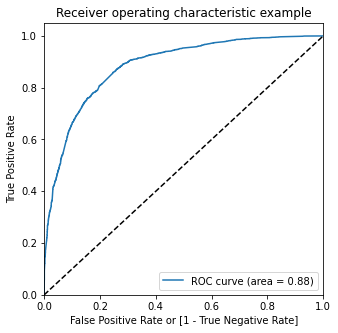

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [81]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.648609,1,1,1,1,1,1,1,1,0,0,0
1,0,0.130494,0,1,1,0,0,0,0,0,0,0,0
2,0,0.226369,0,1,1,1,0,0,0,0,0,0,0
3,0,0.130494,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495356,0,1,1,1,1,1,0,0,0,0,0


In [82]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.578177,0.983713,0.322465
0.2,0.2,0.760510,0.914088,0.663671
0.3,0.3,0.789797,0.874186,0.736585
0.4,0.4,0.808849,0.764658,0.836714
0.5,0.5,0.809951,0.696661,0.881386
0.6,0.6,0.802236,0.626629,0.912965
0.7,0.7,0.773264,0.502850,0.943774
0.8,0.8,0.754212,0.414902,0.968164
0.9,0.9,0.707448,0.261808,0.988447


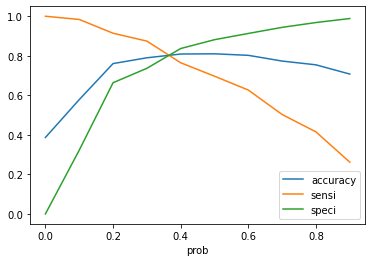

In [83]:
# Plotting accuracy , sensitivity , specificity 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.648609,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.130494,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.226369,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.130494,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495356,0,1,1,1,1,1,0,0,0,0,0,1


In [85]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[3215,  680],
       [ 541, 1915]], dtype=int64)

In [86]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.807746811525744

In [87]:
# Getting values of True Positive , False Postive , True Negative and False Negative
TP = confusion1[1,1]

TN = confusion1[0,0]

FP = confusion1[0,1] 

FN = confusion1[1,0]

In [88]:
# Calculating the sensitivity
TP/(TP+FN)

0.7797231270358306

In [89]:
# Calculating the specificity
TN/(TN+FP)

0.8254172015404364

### Prediction on Test set

In [90]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [91]:
# Substituting all the columns in the final train model
col = X_train.columns

In [92]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Not Selected,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,0,1,0,1,0
2085,1.0,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,0,1,0,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0
8179,1.0,0.170213,0.148768,0,0,0,0,0,0,1,1,0,0
6236,1.0,0.000000,0.000000,1,0,0,0,0,0,0,1,0,0
5240,1.0,0.078014,0.458627,0,0,0,0,0,0,1,0,0,0


In [93]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)




In [94]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [95]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [96]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456733
1,1,0.840172
2,1,0.982674
3,1,0.879761
4,0,0.108093


In [97]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456733,1
1,1,0.840172,1
2,1,0.982674,1
3,1,0.879761,1
4,0,0.108093,0
...,...,...,...
2718,1,0.110771,0
2719,0,0.356575,1
2720,0,0.130494,0
2721,1,0.822312,1


In [98]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8071979434447301

In [99]:
# Creating confusion matrix  for test set
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1405,  339],
       [ 186,  793]], dtype=int64)

In [100]:
# Getting values of True Positive , False Postive , True Negative and False Negative
TP = confusion2[1,1]

TN = confusion2[0,0]

FP = confusion2[0,1] 

FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity
TP/(TP+FN)

0.8100102145045965

In [102]:
# Calculating the specificity
TN/(TN+FP)

0.8056192660550459

## Precision and Recall

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

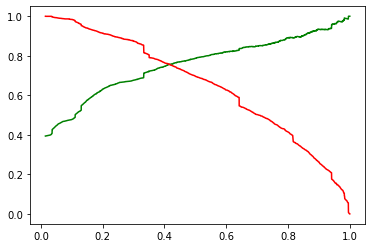

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.648609,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.130494,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.226369,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.130494,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495356,0,1,1,1,1,1,0,0,0,0,0,1


In [108]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112108329396945

In [109]:
# Creating confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3303,  592],
       [ 607, 1849]], dtype=int64)

In [110]:
# Getting values of True Positive , False Postive , True Negative and False Negative
TP = confusion3[1,1]

TN = confusion3[0,0]

FP = confusion3[0,1] 

FN = confusion3[1,0]

In [111]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7574764440802949

In [112]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7528501628664495

### Precision and Recall on test set

In [113]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)




In [114]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [116]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456733
1,1,0.840172
2,1,0.982674
3,1,0.879761
4,0,0.108093


In [117]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456733,1
1,1,0.840172,1
2,1,0.982674,1
3,1,0.879761,1
4,0,0.108093,0
...,...,...,...
2718,1,0.110771,0
2719,0,0.356575,0
2720,0,0.130494,0
2721,1,0.822312,1


In [118]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8163789937568858

In [119]:
# Creating confusion matrix 
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion4

array([[1482,  262],
       [ 238,  741]], dtype=int64)

In [120]:
# Getting values of True Positive , False Postive , True Negative and False Negative
TP = confusion4[1,1]

TN = confusion4[0,0]

FP = confusion4[0,1] 

FN = confusion4[1,0]

In [121]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7387836490528414

In [122]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7568947906026557

### Summary:


Final Observations:
Hot Variables: Based on the coefficient values of the final model, the 3 variables with the highest probability of converting a lead are:
1.Lead Source_Welingak Website (6.3286)
2.TotalVisits (5.4923)
3.Total Time Spent on Website (4.6118)

Test Data Values:
Accuracy - 80.7
Sensitivity - 81
Specificity - 80.5
Precision - 74
Recall - 76
